In [171]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [165]:
from tensorflow.keras.models import load_model

In [167]:
model = load_model("Models/final_model.h5")

In [246]:
car_img1 = cv2.imread('specimens/emer2.jfif')
car_gray = cv2.cvtColor(car_img1,cv2.COLOR_BGR2GRAY)

In [247]:
car_classifier = cv2.CascadeClassifier('HaarCascades/cas3.xml')

In [248]:
cars = car_classifier.detectMultiScale(car_gray,1.2,5)

In [249]:
print("Found {0} cars!".format(len(cars)))

Found 1 cars!


In [250]:
# get car

car_ext = car_img1[y:y+h,h:h+w].copy()
car_ext = cv2.resize(car_ext,(224,224))
car_ext = car_ext.reshape(1,224,224,3)
pred = model.predict(car_ext)
pred = [np.argmax(i) for i in pred]

In [251]:
pred

[1]

In [252]:
for (x,y,w,h) in cars:
    if pred == [1]:
        cv2.rectangle(car_img1,(x,y),(x+w,y+h),(0,255,0),2)
    else:
        cv2.rectangle(car_img1,(x,y),(x+w,y+h),(255,0,0),2)
cv2.imwrite('trial_output/output_1.jpg',car_img1)    

True

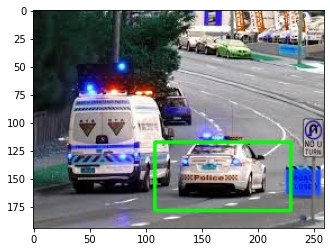

In [253]:
img = cv2.imread("trial_output/output_1.jpg")
plt.imshow(img)